In [46]:
# Base --------------------------------------------------------------------------
import numpy as np

# Viz --------------------------------------------------------------------------- 
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Learning ----------------------------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

from sklearn.model_selection import StratifiedKFold, GridSearchCV, ShuffleSplit
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
# Dataset -----------------------------------------------------------------------
iris = load_iris()
X = iris.data
Y = iris.target

In [36]:
# Split -------------------------------------------------------------------------
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    random_state = 10,
                                                    train_size = 0.5)

In [37]:
# Model -------------------------------------------------------------------------
model = KNeighborsClassifier()

# Fit ---------------------------------------------------------------------------
model.fit(x_train, y_train)

# Predictions -------------------------------------------------------------------
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

# Cross-validation

Now we are going to use a 2-fold cross-validation

In [25]:
# Fit ---------------------------------------------------------------------------
model.fit(x_train, y_train)
model.fit(x_test, y_test)

# Predictions -------------------------------------------------------------------
y_pred1 = model.predict(x_test)
y_pred2 = model.predict(x_train)

# Scores ------------------------------------------------------------------------
acc1 = accuracy_score(y_test, y_pred1)
acc2 = accuracy_score(y_train, y_pred2)

avscore = (acc1 + acc2)/2
avscore

0.96

# Validation Curve

In [38]:
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

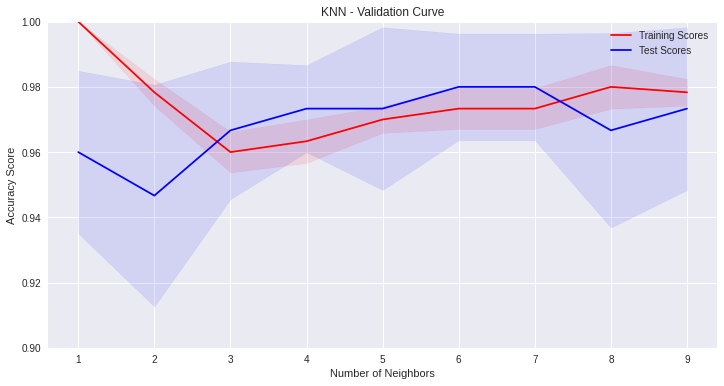

In [45]:
# Validation curve --------------------------------------------------------------
param_range = np.arange(1,10,1)
train_scores, test_scores = validation_curve(model,
                                             X,
                                             Y,
                                             cv = 5,
                                             scoring = 'accuracy',
                                             param_range = param_range,
                                             param_name = 'n_neighbors')

# Mean Values -------------------------------------------------------------------
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

# Graph -------------------------------------------------------------------------
plt.figure(figsize = (12,6))
plt.ylim(0.9,1.0)

plt.plot(param_range, train_scores_mean, label = 'Training Scores', color = 'red')
plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha = 0.1,
                 color = 'red')

plt.plot(param_range, test_scores_mean, label = 'Test Scores', color = 'blue')
plt.fill_between(param_range, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha = 0.1,
                 color = 'blue')

plt.title('KNN - Validation Curve')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')

plt.legend(loc='best')
plt.show()

# Learning Curve

In [47]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
train_size, train_scores, test_scores, fit_times, _ = learning_curve(model,
                                                                     X,
                                                                     Y,
                                                                     cv = cv,
                                                                     n_jobs = -1,
                                                                     train_sizes = np.linspace(0.1, 1.0, 10),
                                                                     return_times = True)

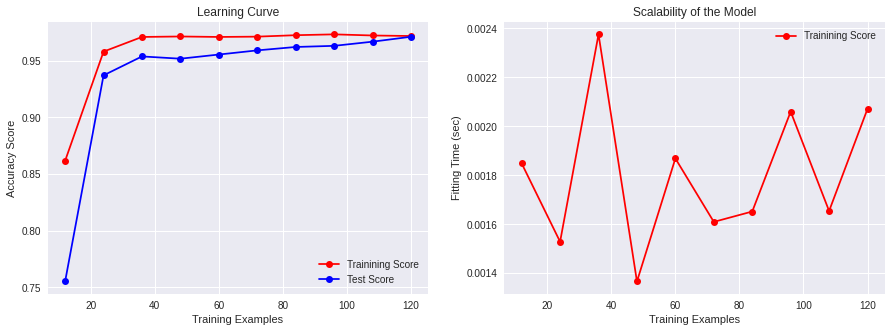

In [56]:
# Mean Values -------------------------------------------------------------------
train_scores_mean = np.mean(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
fit_times_mean = np.mean(fit_times, axis = 1)

# Figures -----------------------------------------------------------------------
plt.figure(figsize=(15,5))
plt.subplot2grid((1,2), (0,0))
plt.plot(train_size, train_scores_mean, 'o-', color = 'red', label = 'Trainining Score')
plt.plot(train_size, test_scores_mean, 'o-', color = 'blue', label = 'Test Score')

plt.title('Learning Curve')
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.legend(loc = 'best')

plt.subplot2grid((1,2), (0,1))
plt.plot(train_size, fit_times_mean, 'o-', color = 'red', label = 'Trainining Score')

plt.title('Scalability of the Model')
plt.xlabel('Training Examples')
plt.ylabel('Fitting Time (sec)')

plt.legend(loc = 'best')
plt.show()